# Abgabe 3: Schwingungen

**Teammitglieder:** René Zarwel, Matthias Kastenmüller

<br>

Importieren allgemein benötigter Bibliotheken:

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pylab as pylab
import numpy.polynomial.polynomial as poly
import numpy as np
from scipy.integrate import odeint
import math
from numpy import array, polyval, polyfit
import vpython as vp         # get VPython modules for animation
vec=vp.vector

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Aufgabe 1: Gedämpfte Schwingungen

Bei einer harmonischen Schwingung wirkt lediglich die rücktreibende Kraft. Daraus ergibt sich folgenden Schwingungsgleichung:

$$
F = -k \cdot x \quad \text{mit} \quad k=\text{Federkonstante} \\
\omega_0 = \sqrt{\frac{k}{m}}  \quad \text{- Ungedämpfte Eigenkreisfrequenz } \\
\ddot{x} + \omega_0^2 \cdot x = 0
$$

Bei der gedämpften Schwingung wirk zusätzlich zur rücktreibenden Kraft noch eine Reibungskraft $F_R$. So wird die Schwingungsgleichung folgendermaßen erweitert:

$$
F_R = - c \cdot v^n \quad\text{mit}\quad c=\text{Dämpfungskonstante} \quad\text{und}\quad n=\{0,\frac{1}{2}, 1, 2\} \\
\gamma = \frac{c}{2 \cdot m} \quad \text{- Abklingkonstante} \\
\ddot{x} + 2 \cdot \gamma \cdot \dot{x}^n + \omega_0^2 \cdot x = 0
$$

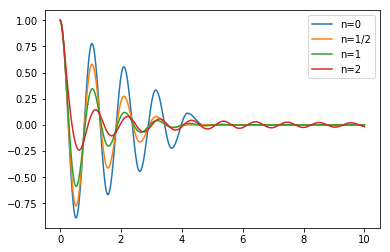

In [2]:
x0 = [1, 0]          # Anfangsbedingungen [x, v]
t = np.linspace(0,10,500)  # 500 Zeitschritte von 0 bis 10s

#Own Sign Func cause np.sign is unstable with odeint
sgn = lambda x: np.tanh(100*x)

def swing(x,t):
    return[ x[1], -2*gamma*sgn(x[1])*abs(x[1])**n-(omega0**2)*x[0] ]

omega0 = 6                  
gamma = 1

n=0
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=0")

n=1/2
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=1/2")

n=1
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=1")

n=2
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=2")

plt.legend()

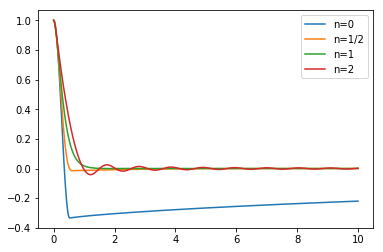

In [3]:
omega0 = 6                  
gamma = 6

n=0
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=0")

n=1/2
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=1/2")

n=1
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=1")

n=2
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=2")

plt.legend()

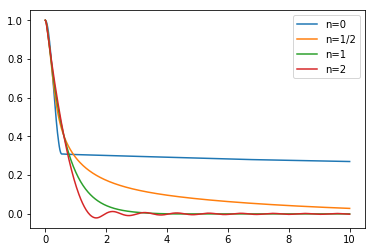

In [4]:
omega0 = 6                  
gamma = 12

n=0
x = odeint(func=swing, y0=x0, t=t, atol=1e-1)
plt.plot(t, x[:,0], label="n=0")

n=1/2
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=1/2")

n=1
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=1")

n=2
x = odeint(func=swing, y0=x0, t=t)
plt.plot(t, x[:,0], label="n=2")

plt.legend()

## Aufgabe 2: Das nichtlineare Pendel I

Es soll folgenden nicht Differentialgleichung für ein nichtlineares Pendel gelöst werden:

$$
\ddot{\theta} + \frac{g}{l} \cdot \sin(\theta) = 0 \\
\text{mit} \quad g=9.81\frac{m}{s^2} \quad \text{und} \quad l=10cm
$$

In [5]:
t = np.linspace(0,1,500)  # 500 Zeitschritte von 0 bis 10s
g = 9.81
l = 0.01

def nlswing(x,t):
    return[ x[1], -g/l*math.sin(x[0]) ]

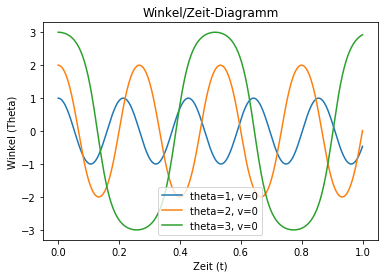

In [6]:
theta0 = [1, 0]     
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot(t, theta[:,0], label="theta=1, v=0")

theta0 = [2, 0]        
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot(t, theta[:,0], label="theta=2, v=0")

theta0 = [3, 0]        
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot(t, theta[:,0], label="theta=3, v=0")

# Plot Beschriftung
plt.title('Winkel/Zeit-Diagramm')
plt.xlabel('Zeit (t)')
plt.ylabel('Winkel (Theta)')
plt.legend()

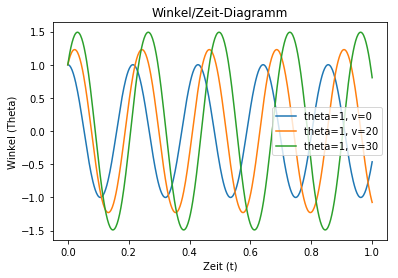

In [7]:
theta0 = [1, 0]     
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot(t, theta[:,0], label="theta=1, v=0")

theta0 = [1, 20]        
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot(t, theta[:,0], label="theta=1, v=20")

theta0 = [1, 30]        
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot(t, theta[:,0], label="theta=1, v=30")

# Plot Beschriftung
plt.title('Winkel/Zeit-Diagramm')
plt.xlabel('Zeit (t)')
plt.ylabel('Winkel (Theta)')
plt.legend()

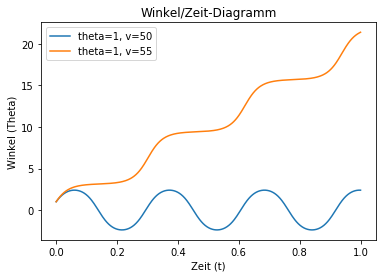

In [8]:
theta0 = [1, 50]        
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot(t, theta[:,0], label="theta=1, v=50")

theta0 = [1, 55]        
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot(t, theta[:,0], label="theta=1, v=55")

# Plot Beschriftung
plt.title('Winkel/Zeit-Diagramm')
plt.xlabel('Zeit (t)')
plt.ylabel('Winkel (Theta)')
plt.legend()

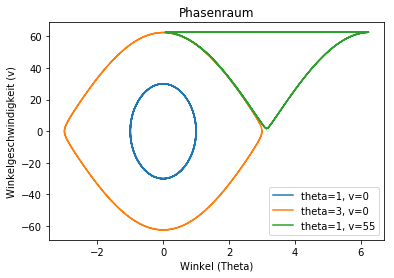

In [9]:
theta0 = [1, 0]     
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot([math.fmod(t,2*math.pi) for t in theta[:,0]], theta[:,1], label="theta=1, v=0")

theta0 = [3, 0]     
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot([math.fmod(t,2*math.pi) for t in theta[:,0]], theta[:,1], label="theta=3, v=0")

theta0 = [1, 55]     
theta = odeint(func=nlswing, y0=theta0, t=t)
plt.plot([math.fmod(t,2*math.pi) for t in theta[:,0]], theta[:,1], label="theta=1, v=55")

# Plot Beschriftung
plt.title('Phasenraum')
plt.xlabel('Winkel (Theta)')
plt.ylabel('Winkelgeschwindigkeit (v)')
plt.legend()

## Aufgabe 3: Erzwungene Schwingung

## Aufgabe 4: Das nichtlineare Pendel II